Copyright © 2023 Yuchen Wang(wang3602@purdue.edu), Saurabh Baswaraj Shivpuje(sshivpuj@purdue.edu)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## GQME quantum algorithm

Here, we provide the code for implementing GQME quantum alogirthm on IBM quantum simulator QASM, and on IBM real quantum machine. This code allows you to choose your G matrix and initial density matrix, these are the two only input requirement. The example discussed in this code is a spin-boson benchmark model. For detailed explainations, please refer our work: https://arxiv.org/abs/2209.04956. In this tutorial, you will find two section. First we explained the implementation using complete G matrix. The python and IBM qiskit codes of algorithm involved in implemententing GQME are included in the following order:   

* Importing libraries
* Loading IBMQ account

(A) Complete G matrix:
1. Accepting inputs 
2. Doing classical simulation check
3. Quantum simulation with QASM simulator of Qiskit
4. Simulation on a real machine (with error mitigation) 
5. Comparison between the Donor & Acceptor difference for all three simulations

(B) Reduced G matrix:
1. Accepting inputs 
2. Doing classical simulation check
3. Quantum simulation with QASM simulator of Qiskit
4. Simulation on a real machine (with error mitigation) 
5. Comparison between the Donor & Acceptor difference for all three simulations



### Importing Libraries

The four major libraries imported for this code are: 
* "numpy" for all matrix related numerical calculations
* "scipy" for calculating square root of matrix
* "matplotlib" for generating plots from results obtained
* "qiskit" for all types of quantum implementation


In [38]:
import numpy as np
import scipy.linalg as sp
from scipy.linalg import sqrtm
from numpy import linalg as la
import matplotlib.pyplot as plt 
# import qiskit 
from qiskit import *
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_circuit_layout, plot_histogram
from qiskit.compiler import transpile

### Loading IBMQ account

Here, the user has to include the IBM Quantum (IBMQ) account credentials to access the systems and simulators available in IBM Quantum. You can create your IBMQ account here: https://quantum-computing.ibm.com/ . The detailed explaination of how to access your account for running calculations is given at: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq . 

In [39]:
from qiskit import IBMQ
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-11 16:00:45,977: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# (A) Complete G Matrix

## (1) Accepting inputs

The G matrx of GQME which is stored in 16 files for each element in a matrix is collected in the following part of code. User has to change the file location in "loadtext" command according to file location on user's device. The last line of this code section is where you create your inial density matrix in flattened vector form. 

In [205]:
'''
Reading G matrix(for GQME) that encode the dynamics
In this case G matrix is for spin-boson two level system with a donor state and an acceptor state
'''


inputg0000 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0000_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0001 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0001_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0010 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0010_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0011 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0011_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0100 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0100_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0101 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0101_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0110 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0110_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0111 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0111_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1000 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1000_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1001 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1001_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1010 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1010_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1011 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1011_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1100 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1100_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1101 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1101_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1110 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1110_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1111 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1111_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")

gmatrix = np.column_stack( (inputg0000[:,0], inputg0000[:,1]+ 1j*inputg0000[:, 2], inputg0001[:,1]+ 1j*inputg0001[:, 2], inputg0010[:,1]+ 1j*inputg0010[:, 2], inputg0011[:,1]+ 1j*inputg0011[:, 2], \
      inputg0100[:,1]+ 1j*inputg0100[:, 2],  inputg0101[:,1]+ 1j*inputg0101[:, 2], inputg0110[:,1]+ 1j*inputg0110[:, 2],  inputg0111[:,1]+ 1j*inputg0111[:, 2], \
      inputg1000[:,1]+ 1j*inputg1000[:, 2], inputg1001[:,1]+ 1j*inputg1001[:, 2],  inputg1010[:,1]+ 1j*inputg1010[:, 2],  inputg1011[:,1]+ 1j*inputg1011[:, 2], \
    inputg1100[:,1]+ 1j*inputg1100[:, 2],  inputg1101[:,1]+ 1j*inputg1101[:, 2],  inputg1110[:,1]+ 1j*inputg1110[:, 2],  inputg1111[:,1]+ 1j*inputg1111[:, 2]))

rho= np.array([1+0j,0,0,0]) #setting the initial flattened density matrix rho to be (1,0,0,0)


## (2) Doing classical simulation check

For quantum computation, we would need to generate the unitary operator form of G matrix. This is done through dilation process as explained in our work:https://arxiv.org/abs/2209.04956. Here, we produce dilated unitary matrix and immedietly confirm their operation classicaly on user's classical machine. 

In [206]:
iden2= np.eye(4) #create 4*4 identity matrix

result=np.zeros((4000,2), "complex") #initialize variable for storing results
op_norm = np.zeros(4000)  #record the operator norm
for i in range (0,4000):
    gm=np.reshape(gmatrix[i,1:],(4,4))
    op_norm[i] = la.norm(gm,2) #calculate operator norm 
    # check if the matrix is contraction i.e. op_norm <1 if not divided by the norm
    if la.norm(gm,2)>1:
        gm= gm/la.norm(gm,2)
    else:
        op_norm[i] = 1
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))# calculate defect matrix for dilation
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
        
# dilate the G matrix to create unitary operator Ufirst in this case it is 1 dilation
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]])
    final=np.dot(Ufirst,(np.concatenate([rho,np.zeros(4)])))   
    indices=[0,3] # choosing the 1st and 4th elements of rho that record the population of the two states
    result[i]=op_norm[i]*np.take(final.real,indices)


### Storing the classical simulation results for comparision

The results obtained in this section will be required to compare with realizations procured from quantum simulation on both real machine and QASM simulator.

In [207]:
diffs_classic=[]
for i in range(4000):
    diffs_classic.append(result[i,0].real-result[i,1].real)

### Following part plots the population of the donor state and the acceptor state

Here, we quickly note the behaviour of system. This helps is understanding what we should expect from the quantum simulations.

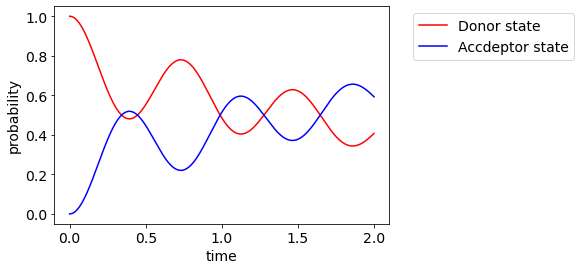

In [208]:
time_array = np.arange(0, 2, 0.0005) #totaling of 4000 time steps from 0 to 2 
plt.plot(time_array, result[:,0].real, 'r-', label="Donor state")
plt.plot(time_array, result[:,1].real, 'b-', label='Accdeptor state')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Following part plots the population difference


Text(0, 0.5, 'Population diffs')

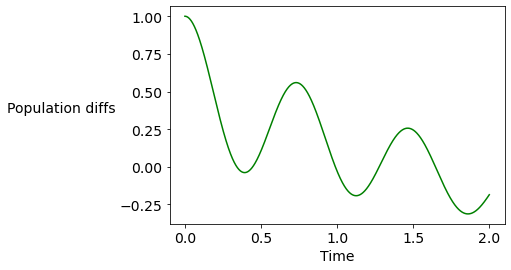

In [209]:
plt.plot(time_array, (result[:,0].real-result[:,1].real), 'g-', label="population difference")
plt.xlabel('Time')
plt.ylabel('Population diffs', rotation=0, ha='right')

## (3) Quantum simulation with QASM simulator of Qiskit|

### Any single G matrix is chosen to see the transpiled quantum circuit

In [210]:
# Initial density matrix at t=0
rho= np.array([1+0j,0,0,0])

i=2000 # pick a random G matrix, here we are choosing G matrix for t=2000*timestep
gm=np.reshape(gmatrix[i,1:],(4,4))
gm= gm/la.norm(gm,2) # make sure it is contraction
fcon = (gm.conjugate()).T
fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
Ufirst= np.block([[gm,fcondef],[fdef,-fcon]])

### Creating a quantum circuit and measuring probabilites for chosen G matrix

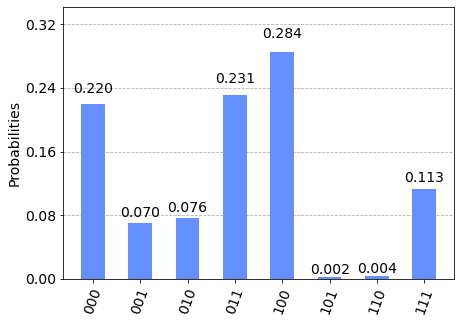

In [211]:
shots = 2000 # number of shots
#create dictionary to store the results. three binary digits due to 8*8 matrix needs three qubits
result = {'000': 0, '001': 0, '010': 0, '011': 0,'100': 0, '101': 0, '110': 0, '111': 0} 
rho= np.array([1+0j,0,0,0])
initial_state = np.concatenate([rho,np.zeros(4)]) # seting  the initail input state
qr = QuantumRegister(3) # create quantum register with 3 qubits
cr = ClassicalRegister(3)# create calssical register to do measurements
qc = QuantumCircuit(qr, cr) # combine to get full quantum circuit
qc.initialize(initial_state, qr) #initialized the input state
U_G_op = Operator(Ufirst) # create custom unitary operator with the dilated G matrix
qc.unitary(U_G_op, qr) # appliying operator to qubits
qc.measure(qr, cr) # measuring 
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts() # record the results notice the backend is QASM simulator
plot_histogram(counts)# plot the distribuition 

### Printing the transpiled circuit

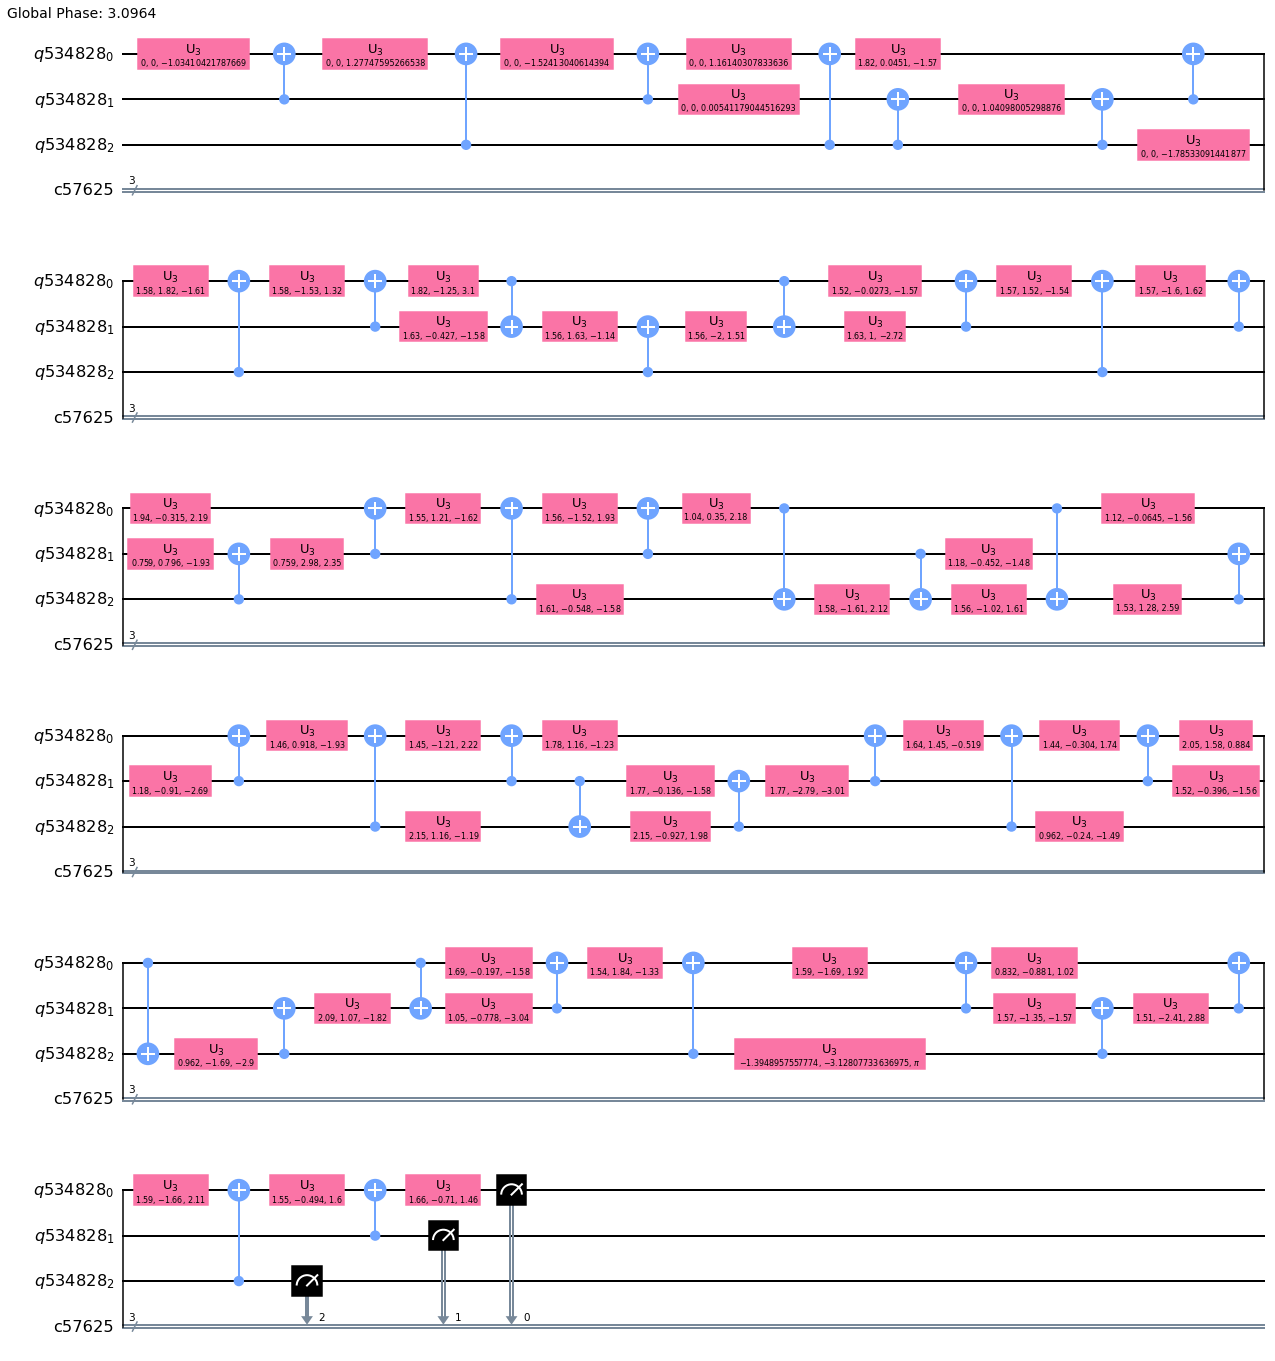

In [212]:
qc_transpiled = transpile(qc, basis_gates=['cx', 'u3','ccx']) # transpile the circuit into the elementray gates cx u3 see qiskit gate glossary
qc_transpiled.draw('mpl') # draw the results mpl is command to make fancy circuit

### Simulation over all G Matrix, for i=0 to i=4000

In [213]:
# simulate the full 4000 matrices
rho= np.array([1+0j,0,0,0]) #Initial density matrix
shots = 2000
result = {'000': 0, '001': 0, '010': 0, '011': 0,'100': 0, '101': 0, '110': 0, '111': 0}
# print(rho)
gm_norm=np.zeros(4000, "complex")
prob_excited = [] # create list to store probability for acceptor state
prob_ground = [] # create list to store probability for donor state

#Doing the calculation for 4000 G matrix in a loop
for i in range (0,4000):
    gm=np.reshape(gmatrix[i,1:],(4,4))
    gm_norm[i] = la.norm(gm,2)
    gm= gm/1.5 # here I use the normalization factor 1.5, to ensure the contraction of all G matrices
    # notice the larger the number the larger the error bar
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]]) # 1 dilation
    #quantum qiskit simulation circuit
    initial_state = np.concatenate([rho,np.zeros(4)])
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)
    qc.initialize(initial_state, qr)
    U_G_op = Operator(Ufirst)
    qc.unitary(U_G_op, qr)
    qc.measure(qr, cr)
    counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    for x in counts:
        result[x] = counts[x]
    # multiply the norm factor to retrive the original data, sqrt because the results is probability not prob density
    pg = np.sqrt(result['000'] / 2000)*1.5 # multiply the norm factor to retrive the original data
    pe =  np.sqrt(result['011'] / 2000)*1.5 # multiply the norm factor to retrive the original data

    prob_excited.append(pe) #Stacking the probabilites calculated for excited state
    prob_ground.append(pg) #Stacking the probabilites calculated for ground state


### Following part plots the population of the donor state and the acceptor state

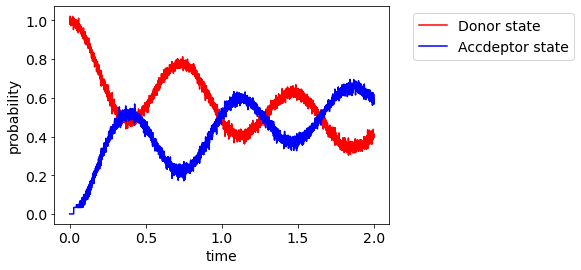

In [216]:
time_array_QASM = np.arange(0, 2, 0.0005)

plt.plot(time_array_QASM, prob_ground, 'r-', label="Donor state")
plt.plot(time_array_QASM, prob_excited, 'b-', label='Accdeptor state')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Following part plots the population difference


Text(0, 0.5, 'Population diffs')

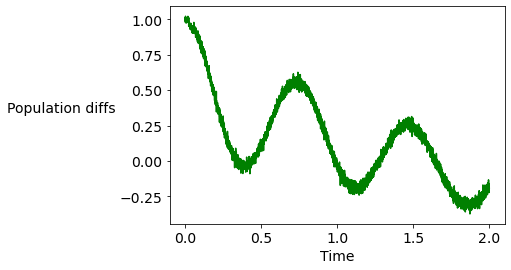

In [217]:
#store and plot the difference in QASM simulation

diffs_quantumsimulator=[]
for x in range (0,4000):
    diffs_quantumsimulator.append(prob_ground[x]-prob_excited[x])
plt.plot(time_array_QASM, diffs_quantumsimulator, 'g-', label="Diff")
plt.xlabel('Time')
plt.ylabel('Population diffs', rotation=0, ha='right')

# (4) Simulation on a real machine (with error mitigation) 

### Choosing the least busy ibm quantum computer
This part of code scans through all the available ibmq machines. It then chooses the machine with less jobs in queue. The name of the least busy machine is printed as an output. The machine name is carry forward in other parts of the code using variable name 'backend'.

In [218]:
#find the least busy backend

from qiskit.providers.ibmq import least_busy

#IBMQ.load_account()#uncomment this if you want to change ibm account

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print(backend)

ibmq_lima


### Error mitigation 
Error mitigation scheme is chosen as per the instructions given in qiskit reference: https://qiskit.org/documentation/tutorials/noise/3_measurement_error_mitigation.html. Execute this code before you perform real machine calculations. 

In [219]:

from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
#Let the real machine run the calibration circuits 
qr = QuantumRegister(5)
qubit_list = [0,1,2]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')
miti_job = execute(meas_calibs, backend=backend, shots=1000)
cal_results = miti_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal') #Calculate the calibration matrix
meas_filter = meas_fitter.filter #Get the filter object

### Simulation performed on real quantum machine

This part of code is similar to QASM simulator code. The only difference here is, we included error mitigation and performed the calculation on real machine.

In [220]:
rho= np.array([1+0j,0,0,0])
shots = 2000
result = {'000': 0, '001': 0, '010': 0, '011': 0,'100': 0, '101': 0, '110': 0, '111': 0}

gm_norm=np.zeros(4000, "complex")
prob_excited = []
prob_ground = []
prob_excited_mitigate = []
prob_ground_mitigate = []

for i in range (0,4000,100): #here I only take 40 data point i.e. time step 0.05
    gm=np.reshape(gmatrix[i,1:],(4,4))
    gm_norm[i] = la.norm(gm,2)
    #if la.norm(gm,2)>1:
    gm= gm/1.5 # here I use the normalization factor 1.5, to ensure the contraction of all G matrices
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]]) # 1 dilation
    
    #real-machine is the same as quantum qiskit simulation circuit
    initial_state = np.concatenate([rho,np.zeros(4)])
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)
    qc.initialize(initial_state, qr)
    U_G_op = Operator(Ufirst)
    qc.unitary(U_G_op, qr)
    qc.measure(qr, cr)
    job = execute(qc, backend=backend, shots=shots)# notice the backend is defined in previous two blocks 
    results = job.result()
    counts = results.get_counts()
    mitigated_results = meas_filter.apply(results) # apply the error mitigation filter
    mitigated_counts = mitigated_results.get_counts()
    
    #original results
    pg = np.sqrt(counts['000'] / 2000)*1.5  # multiply the norm factor to retrive the original data
    pe =  np.sqrt(counts['011'] / 2000)*1.5 # multiply the norm factor to retrive the original data
    prob_excited.append(pe)
    prob_ground.append(pg)
    
    #mitigated results
    pg_m = np.sqrt(mitigated_counts['000'] / 2000)*1.5 # multiply the norm factor to retrive the original data
    pe_m =  np.sqrt(mitigated_counts['011'] / 2000)*1.5 # multiply the norm factor to retrive the original data
    prob_excited_mitigate.append(pe_m)
    prob_ground_mitigate.append(pg_m)
    
   

### Following part plots the ground state 


Text(0, 0.5, 'probability')

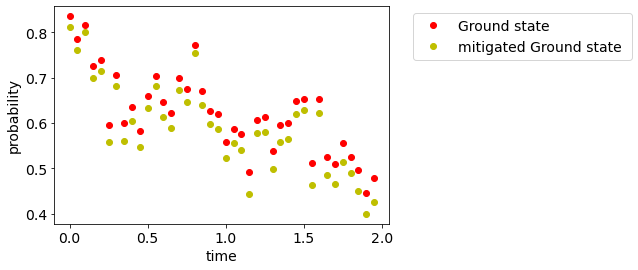

In [221]:
#plot the figure in a discrete points fashion
time_array = np.arange(0, 2, 0.05)
plt.plot(time_array, prob_ground, 'ro', label="Ground state")
plt.plot(time_array, prob_ground_mitigate, 'yo', label="mitigated Ground state ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('time')
plt.ylabel(r'probability')

### Plot of the excited state of the system

Text(0.5, 0, 'Time')

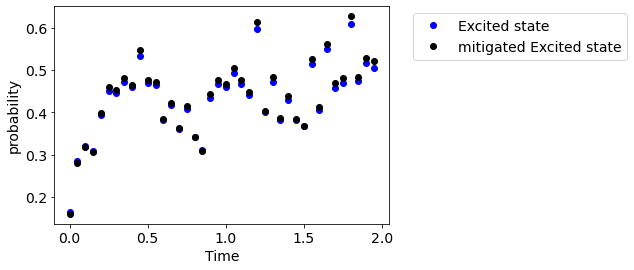

In [222]:
plt.plot(time_array, prob_excited, 'bo', label='Excited state')
plt.plot(time_array, prob_excited_mitigate, 'ko', label='mitigated Excited state')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time')


### Following part plots the population difference

Text(0.5, 0, 'Time')

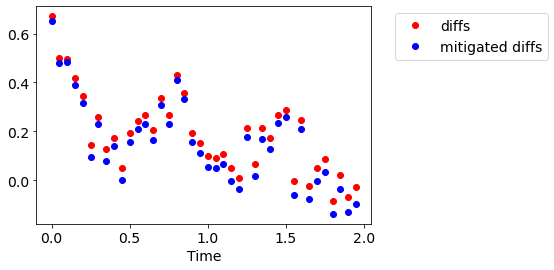

In [223]:
diffs_quantumcomputer=[]
diffs_quantumcomputer_mitigate=[]
for x in range (0,40):
    diffs_quantumcomputer.append(prob_ground[x]-prob_excited[x])
    diffs_quantumcomputer_mitigate.append(prob_ground_mitigate[x]-prob_excited_mitigate[x])
plt.plot(time_array_real,diffs_quantumcomputer, 'ro', label="diffs")
plt.plot(time_array, diffs_quantumcomputer_mitigate, 'bo', label="mitigated diffs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time')



# (5) Comparison between the Donor & Acceptor difference for all three simulations

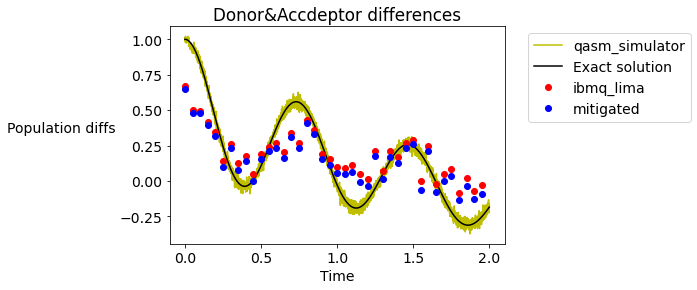

In [224]:
plt.plot(np.arange(0, 2, 0.0005), diffs_quantumsimulator, 'y-', label="qasm_simulator")
plt.plot(np.arange(0,  2, 0.0005), diffs_classic, 'k-', label="Exact solution")
plt.plot(np.arange(0, 2, 0.05), diffs_quantumcomputer, 'ro', label="ibmq_lima")
plt.plot(np.arange(0, 2, 0.05), diffs_quantumcomputer_mitigate, 'bo', label="mitigated")
from matplotlib import rc
rc('font', size=14)
plt.xlabel('Time')
plt.ylabel('Population diffs', rotation=0, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Donor&Accdeptor differences')
plt.show()

# (B) Reduced G Matrix

In this implementation, we will be using only 4 terms from complete G matrix. The execution is similar to what we did in the previous part. 
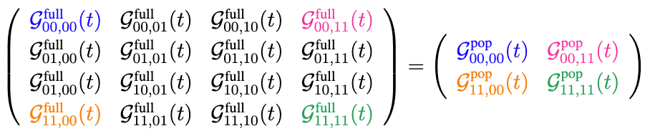

## (1) Accepting inputs
Here we read 4 G matrix elements from 4 different files.

In [159]:
'''
Reading G matrix(for GQME) that encode the dynamics
In this case G matrix is for spin-boson two level system with a donor state and an acceptor state
'''
inputg0000 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0000_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg0011 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_0011_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1100 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1100_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")
inputg1111 = np.loadtxt("./GTerm_model2/G_accu_GQME_Condon_1111_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf15.307.dat")

gmatrix = np.column_stack( (inputg0000[:,0], inputg0000[:,1]+ 1j*inputg0000[:, 2],  inputg0011[:,1]+ 1j*inputg0011[:, 2], \
    inputg1100[:,1]+ 1j*inputg1100[:, 2],  inputg1111[:,1]+ 1j*inputg1111[:, 2]))

rho= np.array([1+0j,0]) #setting the initial flattened density matrix rho to be (1,0,0,0)


## (2) Doing classical simulation check


In [189]:
iden2= np.eye(2) # create 2*2 identity matrix
rho= np.array([1+0j,0]) #setting the initial flattened density matrix rho to be (1,0)

result=np.zeros((4000,2), "complex")
op_norm = np.zeros(4000)# record the operator norm
for i in range (0,4000):
    gm=np.reshape(gmatrix[i,1:],(2,2))
    op_norm[i] = la.norm(gm,2) #calculate operator norm 
    # check if the matrix is contraction i.e. op_norm <1 if not divided by the norm
    if la.norm(gm,2)>1:
        gm= gm/la.norm(gm,2)
    else:
        op_norm[i] = 1
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))# calculate defect matrix for dilation
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
        
# dilate the G matrix to create unitary operator Ufirst in this case it is 1 dilation
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]])
    final=np.dot(Ufirst,(np.concatenate([rho,np.zeros(2)])))   
    indices=[0,1] # choosing the 1st and 2nd elements of rho that record the population of the two states
    result[i]=op_norm[i]*np.take(final.real,indices)

### Following part plots the population of the donor state and the acceptor state


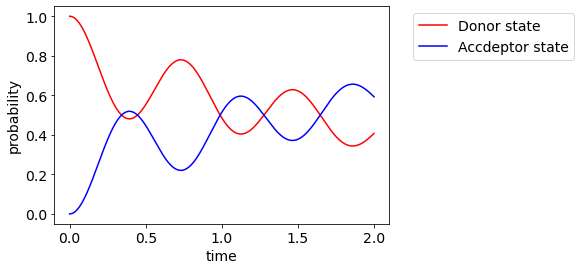

In [190]:
time_array = np.arange(0, 2, 0.0005) #totaling of 4000 time steps from 0 to 2 
plt.plot(time_array, result[:,0].real, 'r-', label="Donor state")
plt.plot(time_array, result[:,1].real, 'b-', label='Accdeptor state')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Following part plots the population difference


Text(0.5, 0, 'Time')

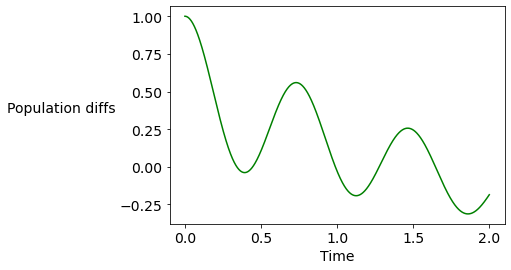

In [191]:
plt.plot(time_array, (result[:,0].real-result[:,1].real), 'g-', label="population difference")
plt.ylabel('Population diffs', rotation=0, ha='right')
plt.xlabel('Time')


## (3) Quantum simulation with QASM simulator of Qiskit|

### Any single G matrix is chosen to see the transpiled quantum circuit

In [192]:
# picking a G matrix to see the transpiled quantum circuit
rho= np.array([1+0j,0])
iden2= np.eye(2) # create 2*2 identity matrix
i=1500 # pick a G matrix
gm=np.reshape(gmatrix[i,1:],(2,2))
gm= gm/1.08 # make sure it is contraction
fcon = (gm.conjugate()).T
fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
Ufirst= np.block([[gm,fcondef],[fdef,-fcon]])


### Creating a quantum circuit and measuring probabilites for chosen G matrix


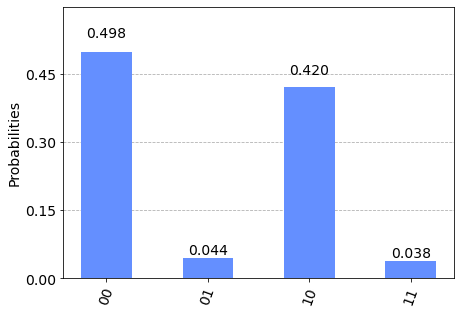

In [193]:
shots = 2000 # number of shots
rho= np.array([1+0j,0])
initial_state = np.concatenate([rho,np.zeros(2)]) # seting  the initail input state
qr = QuantumRegister(2) # create quantum register with 3 qubits
cr = ClassicalRegister(2)# create calssical register to do measurements
qc = QuantumCircuit(qr, cr) # combine to get full quantum circuit
qc.initialize(initial_state, qr) #initialized the input state
U_G_op = Operator(Ufirst) # create custom unitary operator with the dilated G matrix
qc.unitary(U_G_op, qr) # appliying operator to qubits
qc.measure(qr, cr) # measuring 
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts() # record the results notice the backend is QASM simulator
plot_histogram(counts)# plot the distribuition

### Printing the transpiled circuit

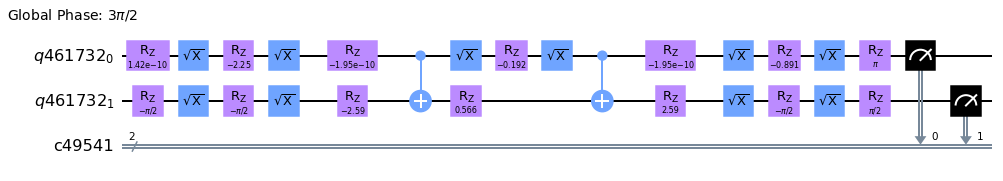

In [165]:
qc_transpiled = transpile(qc, basis_gates=['cx', 'rz','sx']) # transpile the circuit into the elementray gates cx u3 see qiskit gate glossary
qc_transpiled.draw('mpl') # draw the results mpl is command to make fancy circuit

### Simulation over all G Matrix, for i=0 to i=4000

In [194]:
rho= np.array([1+0j,0])
shots = 2000

#create dictionary to store the results. two binary digits due to 2*2 matrix needs two qubits
result = {'00': 0, '01': 0, '10': 0, '11': 0}
gm_norm=np.zeros(4000, "complex")
prob_excited = []# create list to store probability for acceptor state
prob_ground = []# create list to store probability for donor state

for i in range (0,4000):
    gm=np.reshape(gmatrix[i,1:],(2,2))
    gm_norm[i] = la.norm(gm,2)
    gm= gm/1.08 # here I use the normalization factor 1.08, to ensure the contraction of all G matrices

    # notice the larger the number the larger the error bar
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]]) # 1 dilation
    
    #quantum qiskit simulation circuit
    initial_state = np.concatenate([rho,np.zeros(2)])
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)
    qc.initialize(initial_state, qr)
    U_G_op = Operator(Ufirst)
    qc.unitary(U_G_op, qr)
    qc.measure(qr, cr)
    counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    for x in counts:
        result[x] = counts[x]
    
    # multiply the norm factor to retrive the original data, sqrt because the results is probability not prob density
    pg = np.sqrt(result['00'] / 2000)*1.08 # multiply the norm factor to retrive the original data
    pe =  np.sqrt(result['01'] / 2000)*1.08 # multiply the norm factor to retrive the original data

    prob_excited.append(pe) #Stacking the probabilites calculated for excited state
    prob_ground.append(pg) #Stacking the probabilites calculated for ground state


### Following part plots the population of the donor state and the acceptor state


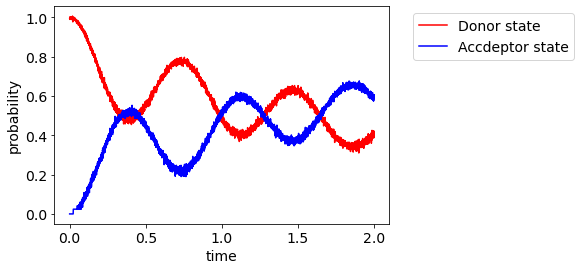

In [195]:
time_array_QASM = np.arange(0, 2, 0.0005)

plt.plot(time_array_QASM, prob_ground, 'r-', label="Donor state")
plt.plot(time_array_QASM, prob_excited, 'b-', label='Accdeptor state')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Following part plots the population difference


Text(0.5, 0, 'Time')

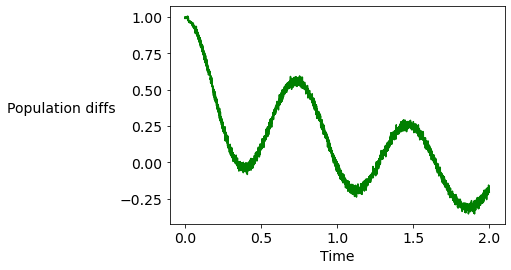

In [203]:
#store and plot the difference in QASM simulation

diffs_quantumsimulator=[]
for x in range (0,4000):
    diffs_quantumsimulator.append(prob_ground[x]-prob_excited[x])
plt.plot(time_array_QASM, diffs_quantumsimulator, 'g-', label="Diff")
plt.ylabel('Population diffs', rotation=0, ha='right')
plt.xlabel('Time')


# (4) Simulation on a real machine (with error mitigation) 

In [198]:
# simulate the full 4000 matrices

rho= np.array([1+0j,0])
shots = 2000

#create dictionary to store the results. two binary digits due to 2*2 matrix needs two qubits
result = {'00': 0, '01': 0, '10': 0, '11': 0}
gm_norm=np.zeros(4000, "complex")
prob_excited_r = []# create list to store probability for acceptor state
prob_ground_r = []# create list to store probability for donor state
inum=1

for i in range (0,4000,100):
    gm=np.reshape(gmatrix[i,1:],(2,2))
    gm_norm[i] = la.norm(gm,2)
    gm= gm/1.08 # here I use the normalization factor 1.08, to ensure the contraction of all G matrices

    # notice the larger the number the larger the error bar
    fcon = (gm.conjugate()).T
    fdef = sp.sqrtm(iden2-np.dot(fcon,gm))
    fcondef = sp.sqrtm(iden2-np.dot(gm,fcon))
    Ufirst= np.block([[gm,fcondef],[fdef,-fcon]]) # 1 dilation
    
    #quantum qiskit simulation circuit
    initial_state = np.concatenate([rho,np.zeros(2)])
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)
    qc.initialize(initial_state, qr)
    U_G_op = Operator(Ufirst)
    qc.unitary(U_G_op, qr)
    qc.measure(qr, cr)
    counts = execute(qc, backend=backend, shots=shots).result().get_counts()
    for x in counts:
        result[x] = counts[x]
    
    # multiply the norm factor to retrive the original data, sqrt because the results is probability not prob density
    pg = np.sqrt(result['00'] / 2000)*1.08 # multiply the norm factor to retrive the original data
    pe =  np.sqrt(result['01'] / 2000)*1.08 # multiply the norm factor to retrive the original data

    prob_excited_r.append(pe)
    prob_ground_r.append(pg)

    inum +=1

### Following part plots the population of the donor state and the acceptor state


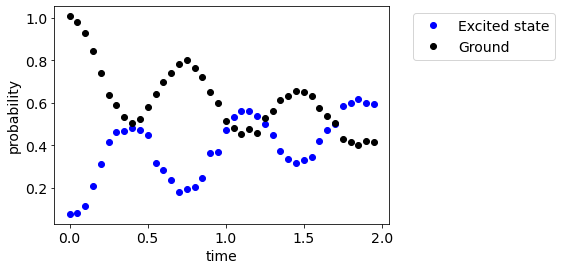

In [199]:
time_array = np.arange(0, 2, 0.05) #totaling of 4000 time steps from 0 to 2 

plt.plot(time_array, prob_excited_r, 'bo', label='Excited state')
plt.plot(time_array, prob_ground_r, 'ko', label='Ground')
plt.xlabel('time')
plt.ylabel(r'probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Following part plots the population difference


Text(0.5, 0, 'Time')

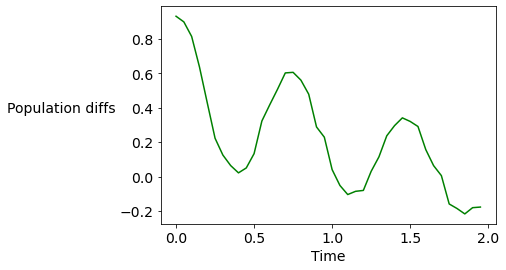

In [201]:
#store and plot the difference in QASM simulation

diffs_quantumcomputer=[]
for x in range (0,40):
     diffs_quantumcomputer.append(prob_ground_r[x]-prob_excited_r[x])
plt.plot(time_array,  diffs_quantumcomputer, 'g-', label="Diff")
plt.ylabel('Population diffs', rotation=0, ha='right')
plt.xlabel('Time')


# (5) Comparison between the Donor & Acceptor difference for all three simulations

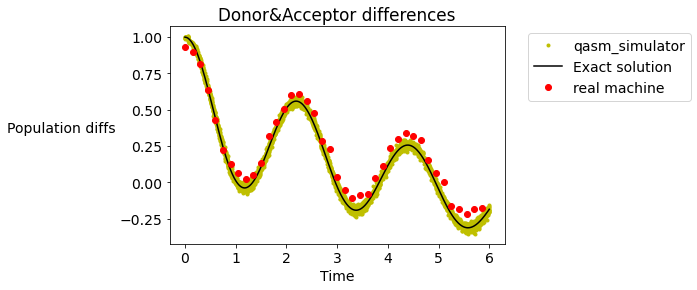

In [204]:
plt.rcParams['text.usetex'] = False
plt.plot(np.arange(0, 6, 0.0015), diffs_quantumsimulator, 'y.', label="qasm_simulator")
plt.plot(np.arange(0, 6, 0.0015), diffs_classic, 'k-', label="Exact solution")
plt.plot(np.arange(0, 6, 0.15), diffs_quantumcomputer, 'ro', label="real machine")
plt.xlabel('Time')
plt.ylabel('Population diffs', rotation=0, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Donor&Acceptor differences')
plt.show()